In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dataset = pd.read_csv('Data.csv')

In [3]:
# Preview data
dataset.head()

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Education Index
0,Luxembourg,220.1,184.3,65.8,75.2,64.8,8.6,27.0,23.3,82.6,0.875
1,Netherlands,211.3,134.5,73.1,79.3,60.5,7.7,23.5,21.6,87.2,0.890
2,Denmark,209.9,137.3,74.0,78.4,66.9,6.5,27.8,20.6,82.5,0.909
3,Oman,208.9,153.8,81.7,65.1,39.8,3.1,22.1,35.6,67.2,0.700
4,Switzerland,205.0,164.8,73.5,71.5,98.4,11.0,33.0,23.1,79.2,0.902


In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(131, 11)

In [5]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         131 non-null    object 
 1   Quality of Life Index           131 non-null    float64
 2   Purchasing Power Index          131 non-null    float64
 3   Safety Index                    131 non-null    float64
 4   Health Care Index               131 non-null    float64
 5   Cost of Living Index            131 non-null    float64
 6   Property Price to Income Ratio  131 non-null    float64
 7   Traffic Commute Time Index      131 non-null    float64
 8   Pollution Index                 131 non-null    float64
 9   Climate Index                   131 non-null    float64
 10  Education Index                 131 non-null    float64
dtypes: float64(10), object(1)
memory usage: 11.4+ KB


In [6]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality of Life Index,131.0,138.779237,34.332738,21.50,114.515,134.000,162.15,220.10
Purchasing Power Index,131.0,80.715191,38.112947,11.10,52.300,74.530,106.71,185.70
Safety Index,131.0,58.833969,12.388812,19.30,52.300,58.800,67.40,84.50
Health Care Index,131.0,64.717863,9.315007,38.70,58.450,65.200,71.45,86.50
Cost of Living Index,131.0,35.075420,17.020277,10.07,20.350,30.000,45.00,98.40
Property Price to Income Ratio,131.0,12.711985,6.396336,3.10,8.450,11.870,15.04,45.70
Traffic Commute Time Index,131.0,36.601221,9.489158,15.00,29.630,35.400,41.18,65.30
Pollution Index,131.0,58.368473,19.980625,11.80,47.210,60.900,73.05,91.79
Climate Index,131.0,73.887939,15.556737,20.20,61.765,71.900,86.80,99.90
Education Index,131.0,29.208817,40.883103,0.40,0.750,0.875,84.75,97.36


In [7]:
# Count of null values
dataset.isnull().sum()

Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Cost of Living Index              0
Property Price to Income Ratio    0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Education Index                   0
dtype: int64

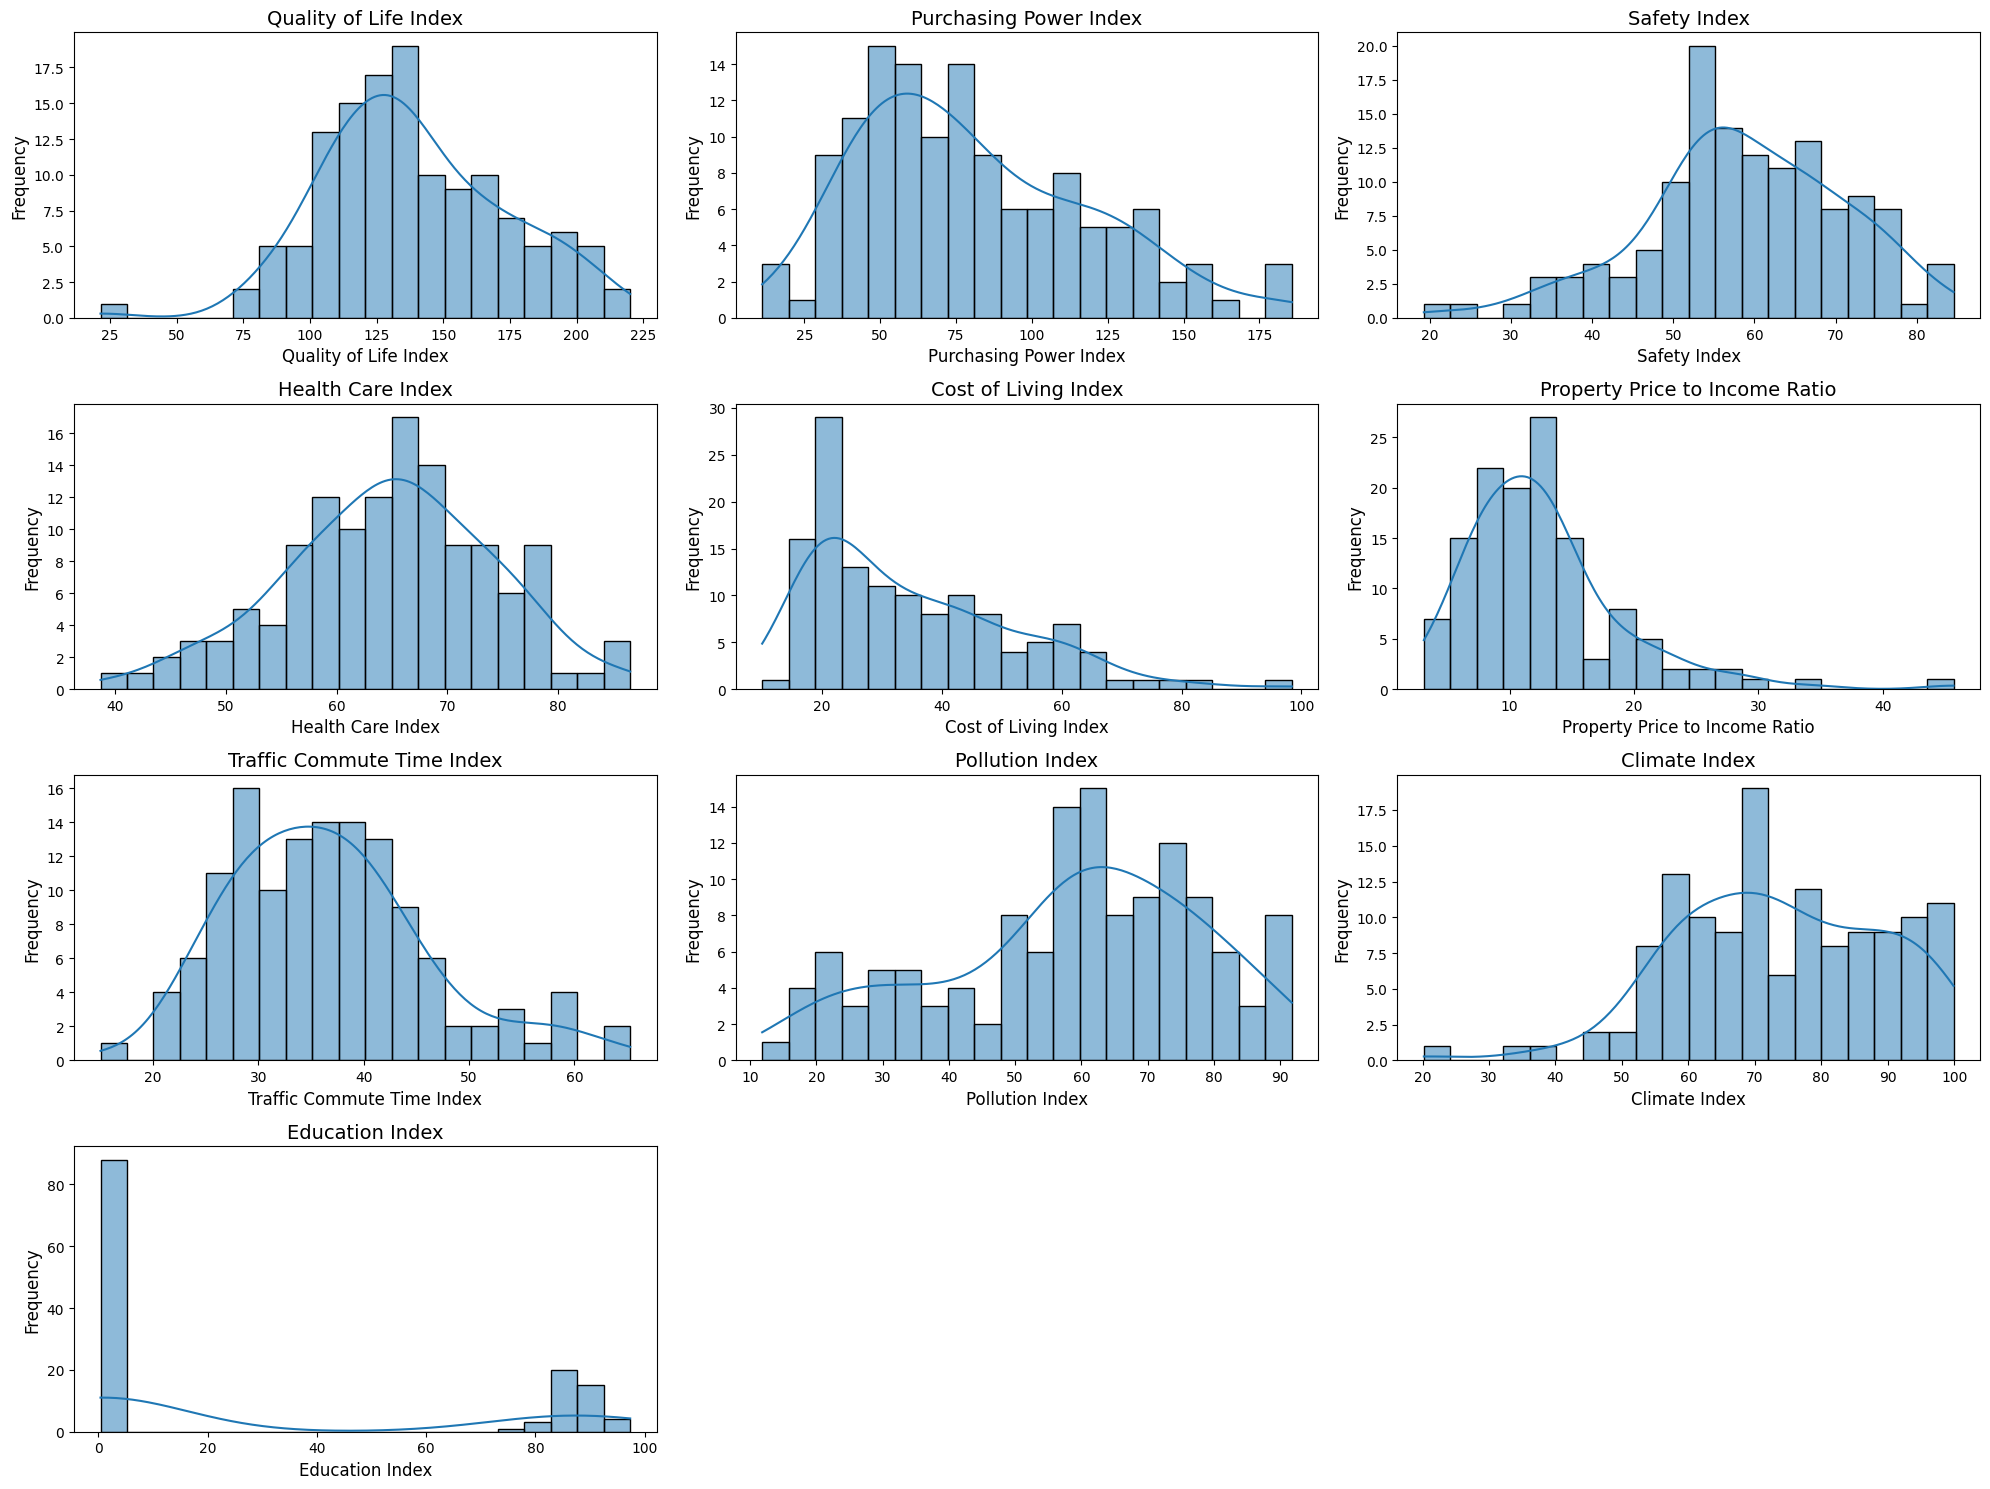

In [8]:
import itertools

# List of all numerical columns in the dataset
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure size and layout
plt.figure(figsize=(20, 15))
length = len(numerical_cols)

# Iterate through each numerical column and plot a histogram with KDE
for i, (col_name, subplot_index) in enumerate(zip(numerical_cols, range(length))):
    plt.subplot(int(length / 3) + 1, 3, subplot_index + 1)  # Adjust layout dynamically
    sns.histplot(data=dataset, x=col_name, kde=True, bins=20)  # Histogram with KDE
    plt.title(col_name, fontsize=14)
    plt.xlabel(col_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()  # Automatically adjust subplot spacing
plt.show()


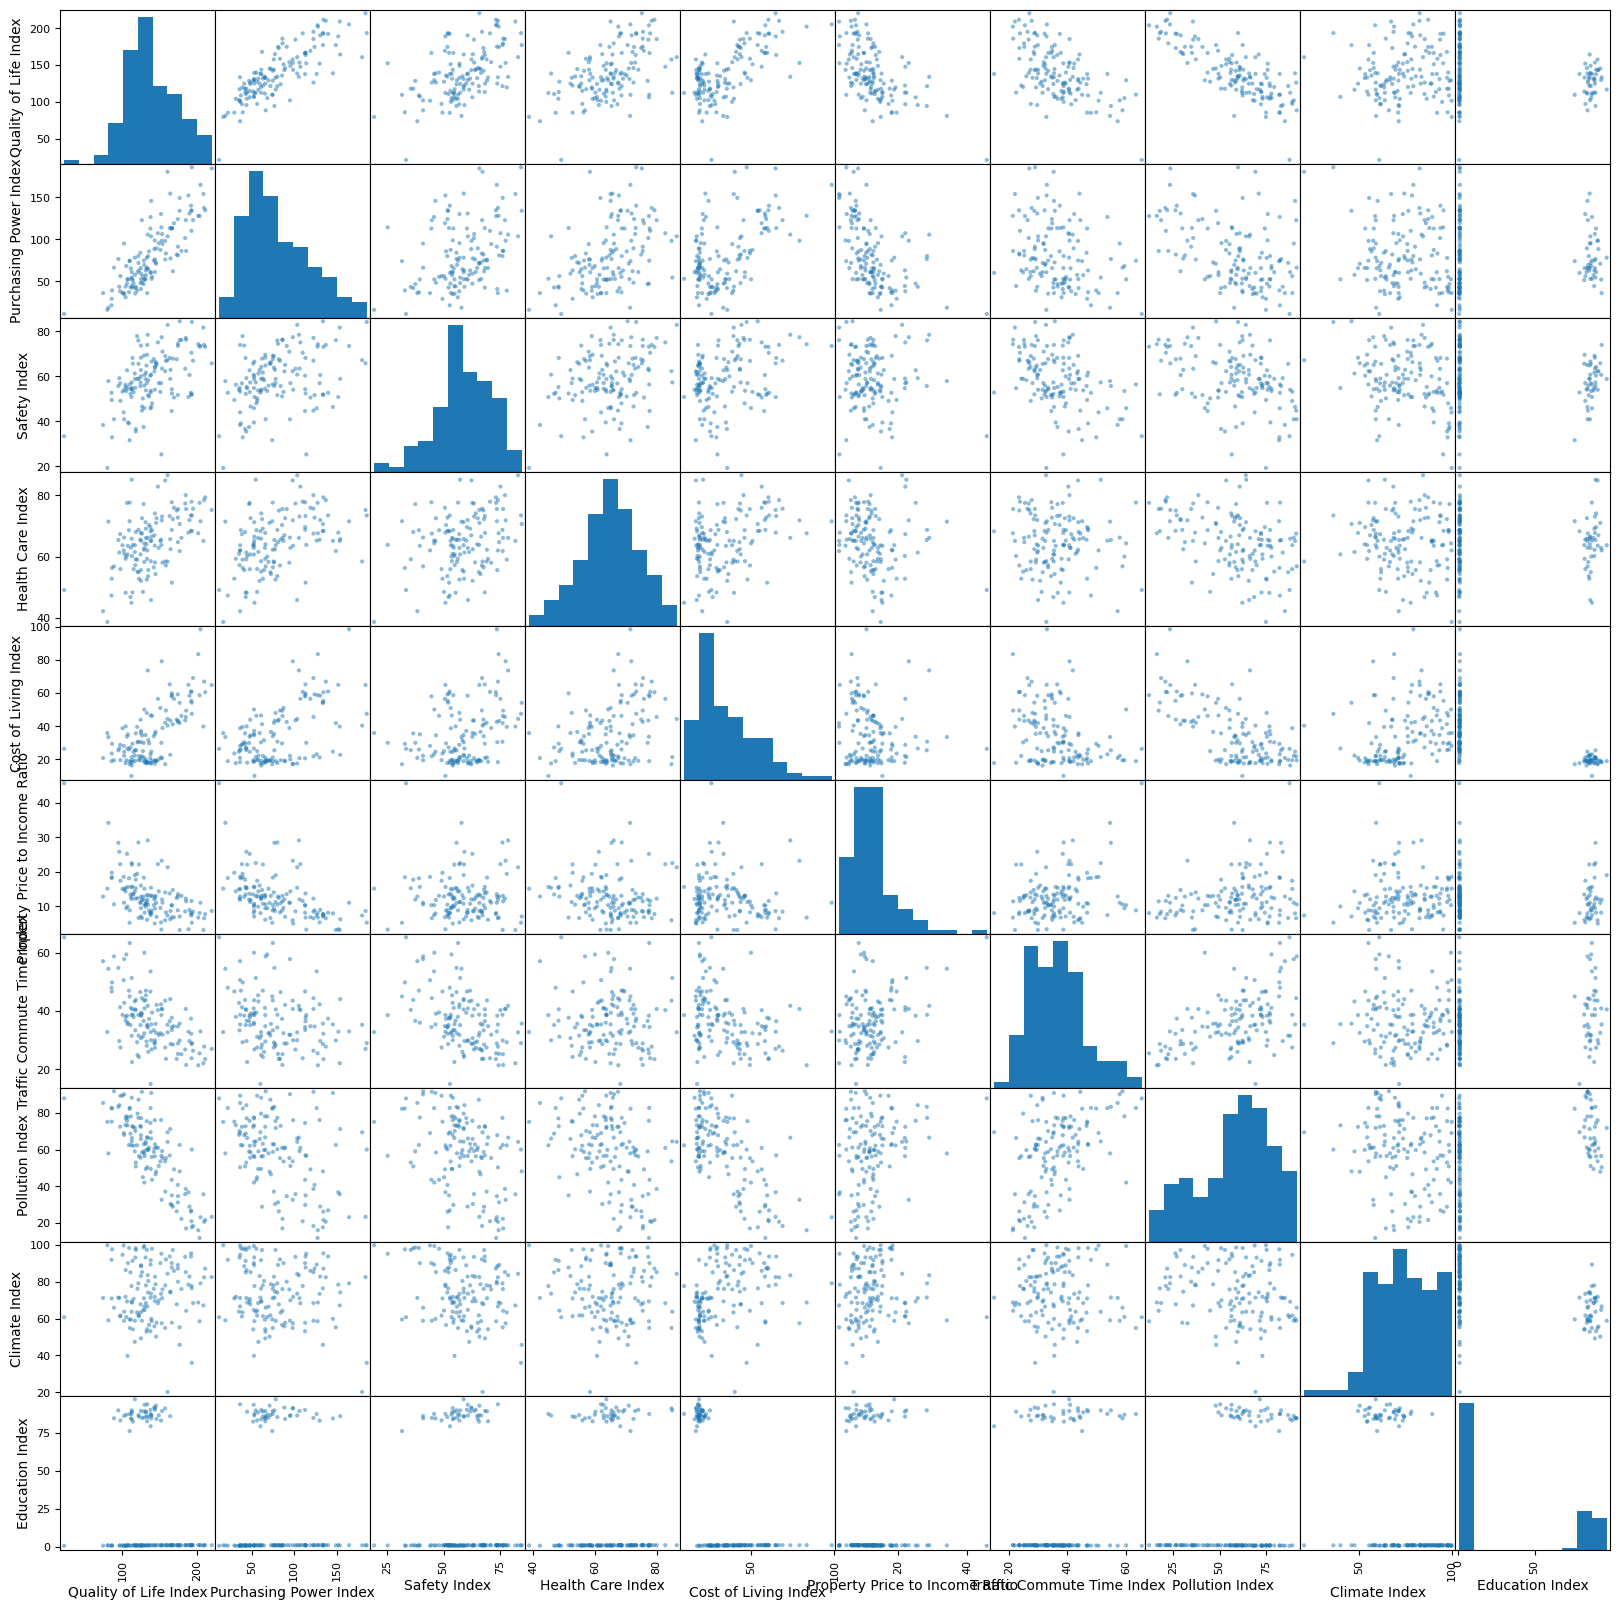

In [9]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

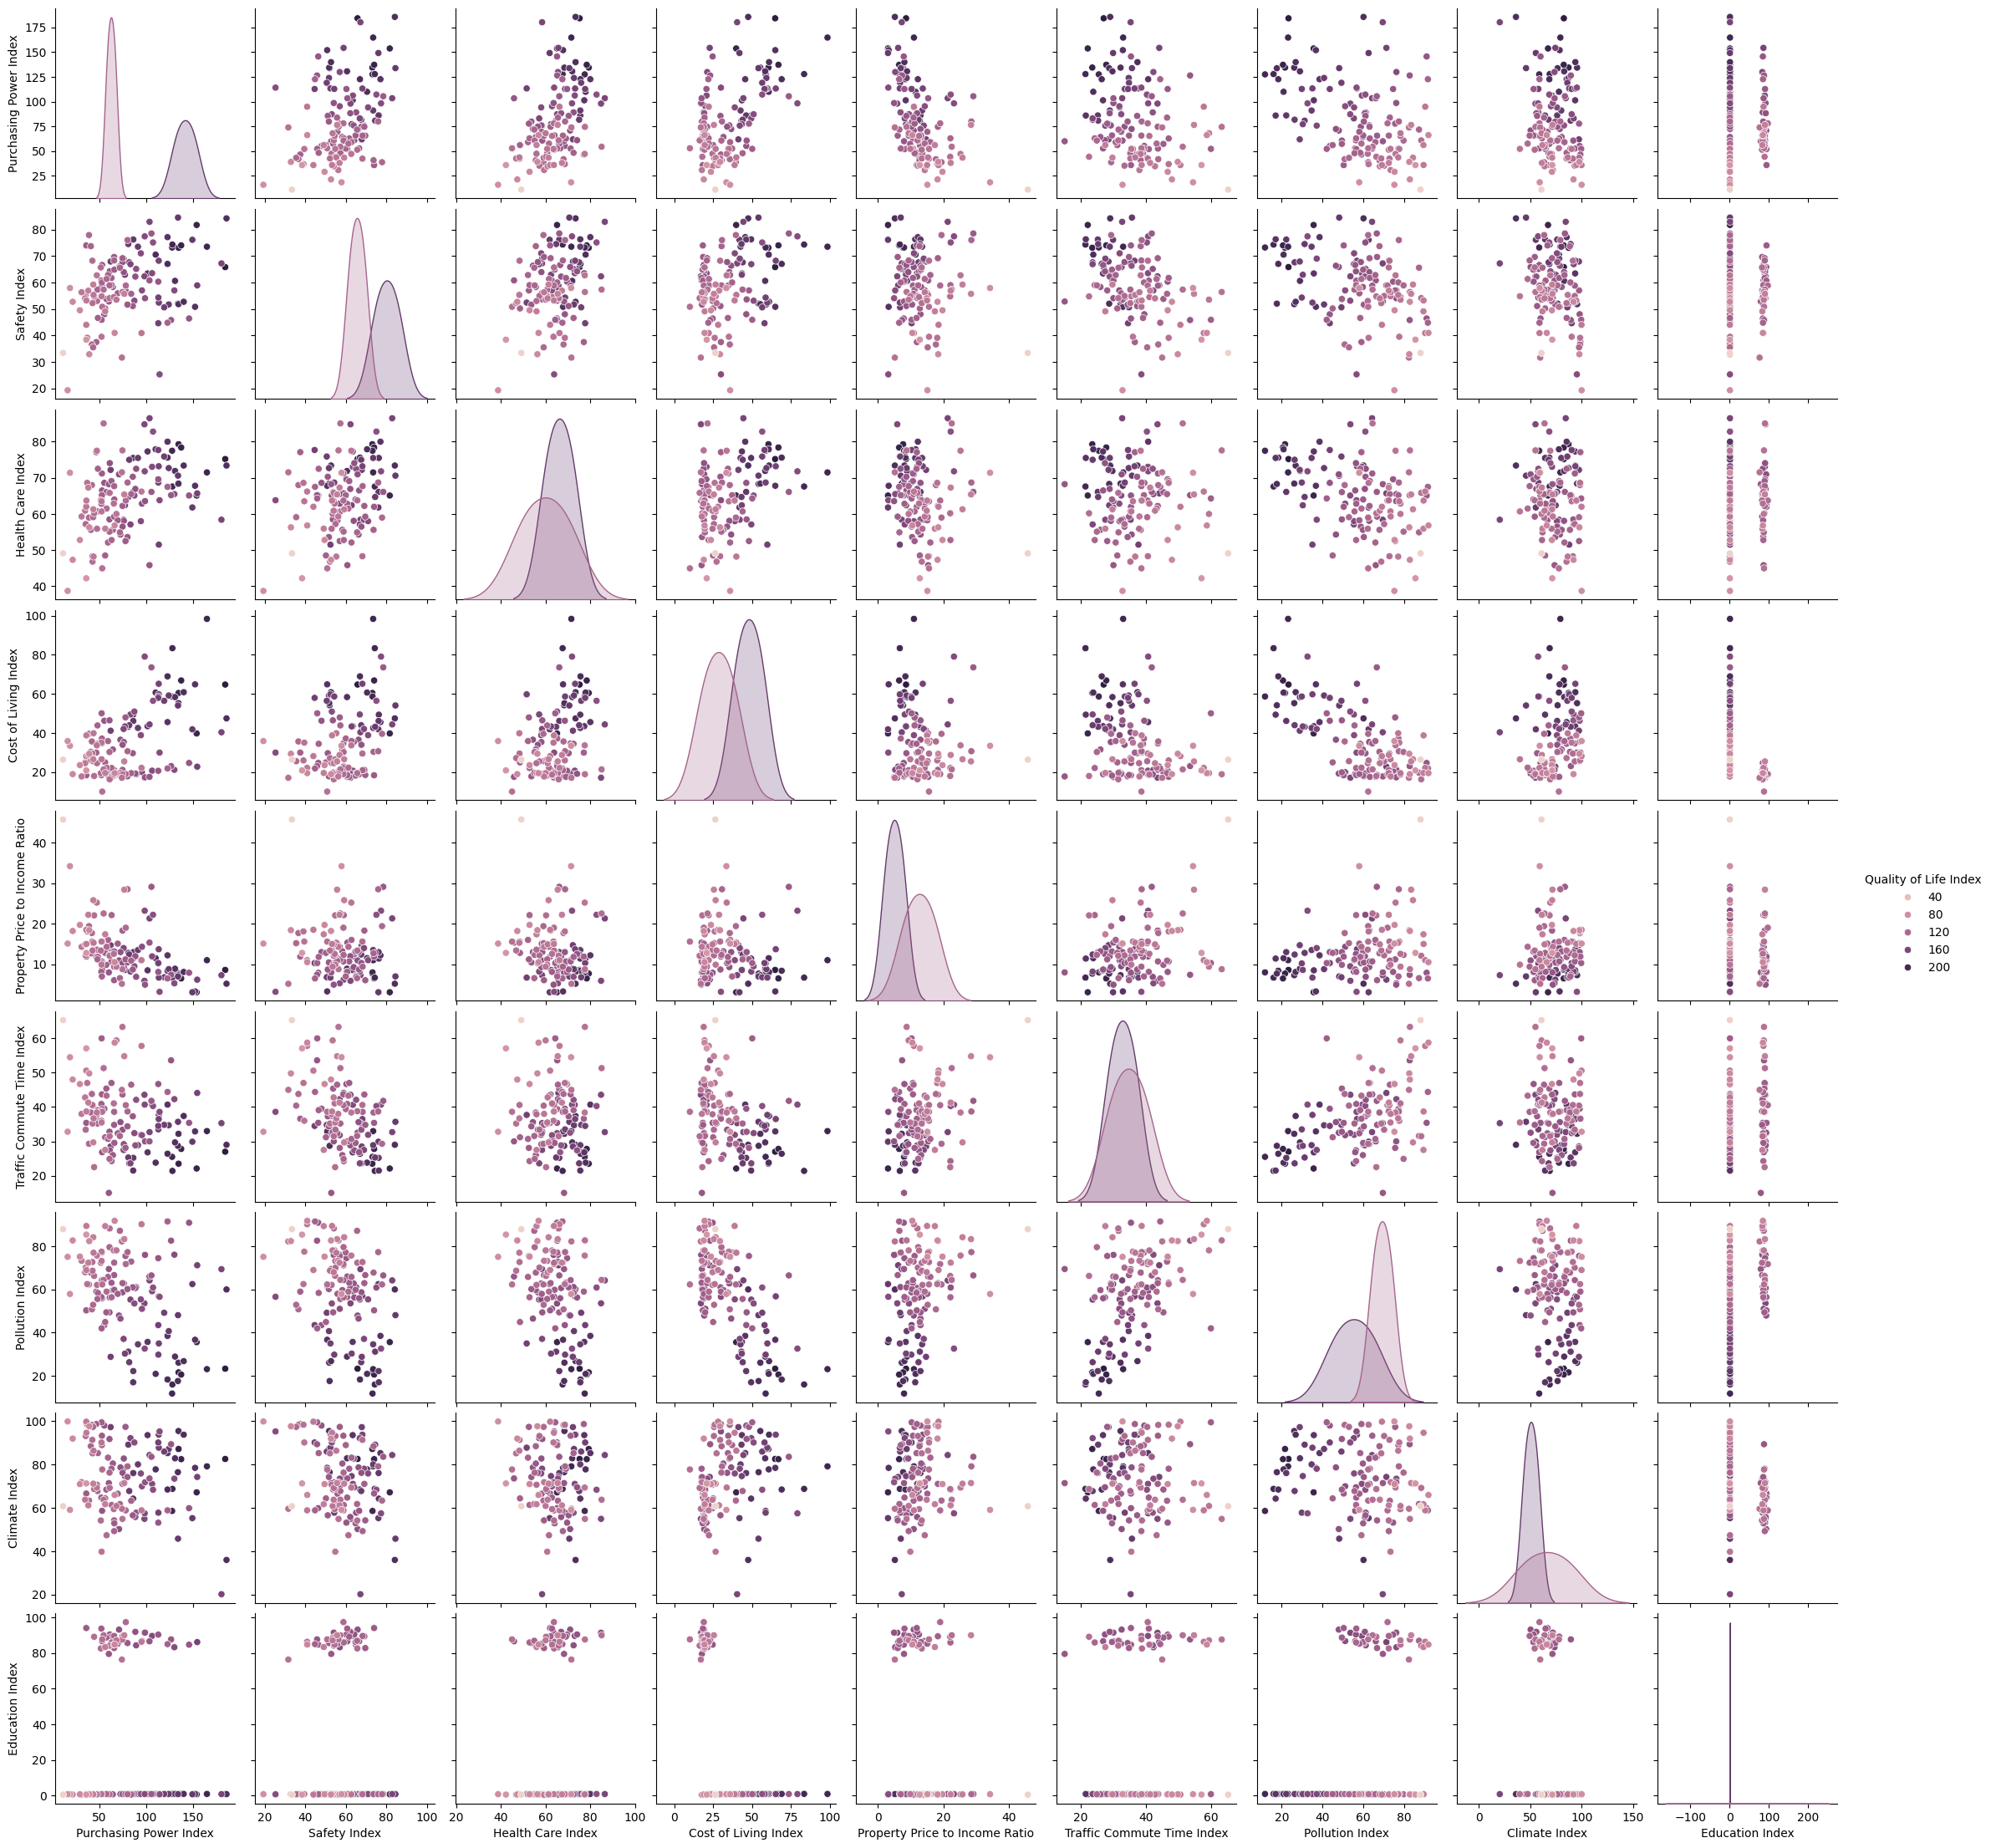

In [10]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Quality of Life Index')
plt.show()

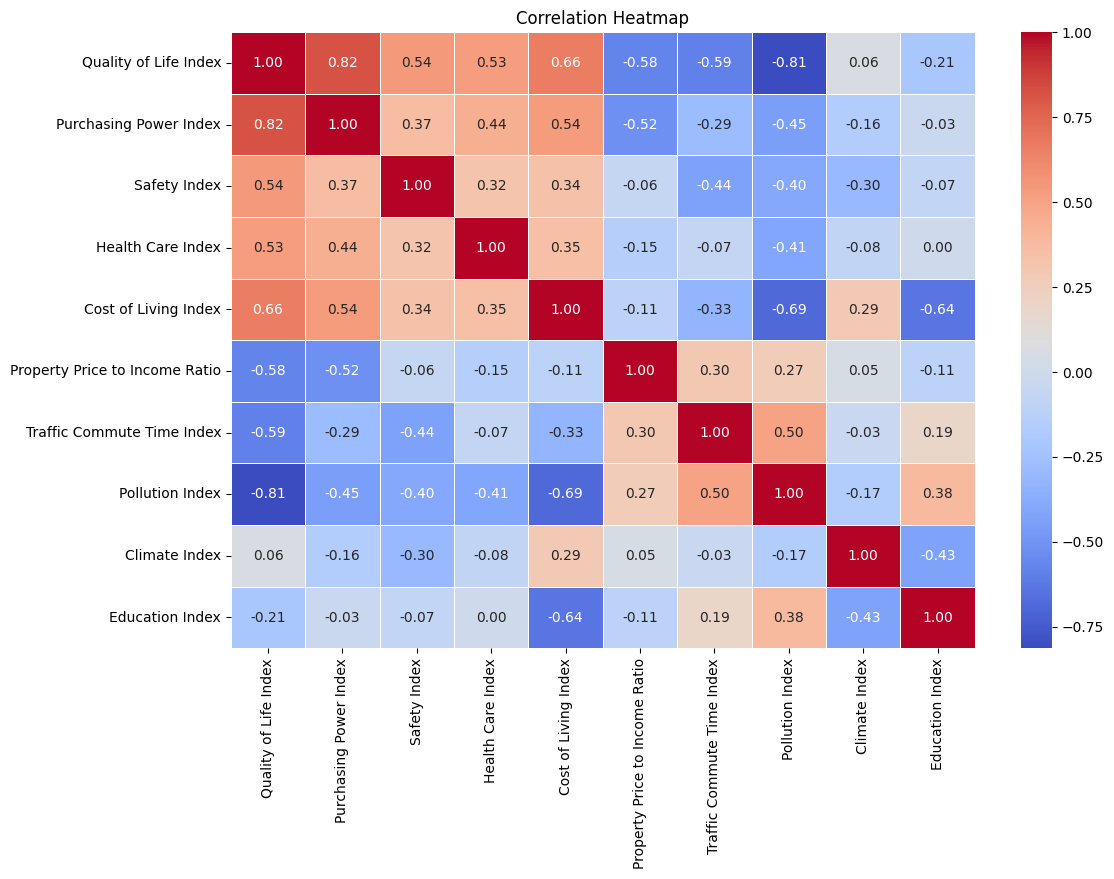

In [11]:
# Select only numerical columns
numerical_data = dataset.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64'])
categorical_cols = dataset.select_dtypes(exclude=['int64', 'float64'])

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the numerical columns
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(numerical_cols), columns=numerical_cols.columns)

# Combine scaled numerical and categorical columns (if any)
dataset_scaled = pd.concat([scaled_numerical_data, categorical_cols.reset_index(drop=True)], axis=1)

# Display the scaled dataset
print(dataset_scaled.head())


   Quality of Life Index  Purchasing Power Index  Safety Index  \
0               1.000000                0.991982      0.713190   
1               0.955690                0.706758      0.825153   
2               0.948640                0.722795      0.838957   
3               0.943605                0.817297      0.957055   
4               0.923968                0.880298      0.831288   

   Health Care Index  Cost of Living Index  Property Price to Income Ratio  \
0           0.763598              0.619608                        0.129108   
1           0.849372              0.570927                        0.107981   
2           0.830544              0.643383                        0.079812   
3           0.552301              0.336579                        0.000000   
4           0.686192              1.000000                        0.185446   

   Traffic Commute Time Index  Pollution Index  Climate Index  \
0                    0.238569         0.143768       0.782936   
1   

In [13]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [14]:
# Inspect the dataset columns
print("Available columns:", dataset_scaled.columns)

# Update the column names based on the dataset
X = dataset_scaled[['Purchasing Power Index', 'Safety Index', 'Health Care Index', 'Climate Index', 'Education Index']].values  
Y = dataset_scaled['Quality of Life Index'].values  

# Display the selected features and target
print("Features (X):")
print(X[:5])  # First 5 rows of features
print("Target (Y):")
print(Y[:5])  # First 5 rows of the target variable



Available columns: Index(['Quality of Life Index', 'Purchasing Power Index', 'Safety Index',
       'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index', 'Education Index', 'Country'],
      dtype='object')
Features (X):
[[0.99198167 0.71319018 0.76359833 0.78293601 0.00489893]
 [0.7067583  0.82515337 0.84937238 0.84065245 0.00505363]
 [0.72279496 0.83895706 0.83054393 0.7816813  0.00524959]
 [0.81729668 0.95705521 0.55230126 0.58971142 0.00309406]
 [0.88029782 0.83128834 0.68619247 0.74027604 0.00517739]]
Target (Y):
[1.         0.95568983 0.94864048 0.94360524 0.92396777]


In [15]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [16]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (104, 5)
X_test shape: (27, 5)
Y_train shape: (104,)
Y_test shape: (27,)


In [17]:
# Convert 'Quality of Life Index' into binary classes based on the median value
median_quality = np.median(Y_train)  # Calculate the median value of the target variable in the training set
y_train_binary = (Y_train > median_quality).astype(int)  # Binary classification: 0 if below or equal to median, 1 if above

# Perform the same transformation for the test target variable
y_test_binary = (Y_test > median_quality).astype(int)

In [18]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train_binary)

LogisticRegression(random_state=42)

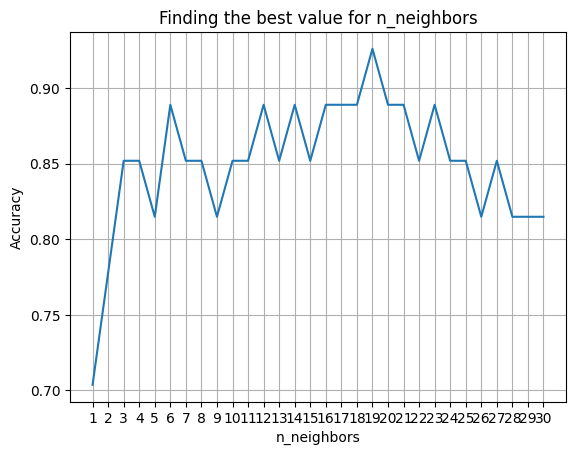

Highest accuracy value: 0.9259259259259259


In [19]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()  # Initialize an empty Pandas Series

for i in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train, y_train_binary)
    prediction = knn_model.predict(X_test)
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test_binary))])

# Resetting index to avoid unexpected behavior
acc.reset_index(drop=True, inplace=True)

plt.plot(X_axis, acc)
plt.xticks(range(1, 31))
plt.title("Finding the best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest accuracy value:', acc.max())

In [20]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train_binary)

KNeighborsClassifier(n_neighbors=24)

In [21]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train_binary)

SVC(kernel='linear', random_state=42)

In [22]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train_binary)

GaussianNB()

In [23]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train_binary)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [24]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train_binary)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [25]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [26]:
#Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test_binary, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test_binary, Y_pred_knn)
accuracy_svc = accuracy_score(y_test_binary, Y_pred_svc)
accuracy_nb = accuracy_score(y_test_binary, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test_binary, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test_binary, Y_pred_ranfor)

In [27]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 88.88888888888889
K Nearest neighbors: 85.18518518518519
Support Vector Classifier: 85.18518518518519
Naive Bayes: 88.88888888888889
Decision tree: 85.18518518518519
Random Forest: 85.18518518518519


In [28]:
#From the above comparison, we can observe that Logistic Regression gets the highest accuracy of 88.88 %

In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_binary, Y_pred_knn)
cm

array([[13,  0],
       [ 4, 10]], dtype=int64)

<Axes: >

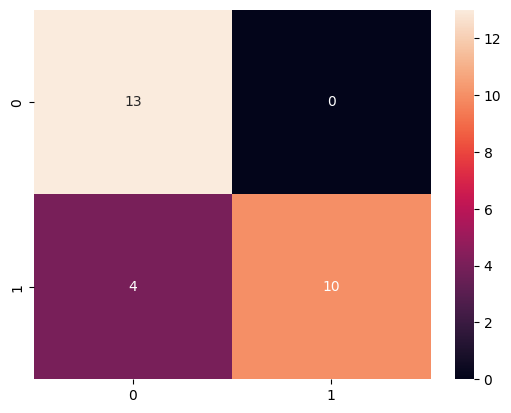

In [30]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [31]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_binary, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.71      0.83        14

    accuracy                           0.85        27
   macro avg       0.88      0.86      0.85        27
weighted avg       0.89      0.85      0.85        27



In [32]:
import pickle
with open("model.pkl","wb") as f: 
    pickle.dump(logreg, f)